In [228]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [229]:
data=loadmat('ex8data1.mat')

In [230]:
data

{'X': array([[ 13.04681517,  14.74115241],
        [ 13.40852019,  13.7632696 ],
        [ 14.19591481,  15.85318113],
        [ 14.91470077,  16.17425987],
        [ 13.57669961,  14.04284944],
        [ 13.92240251,  13.40646894],
        [ 12.82213164,  14.22318782],
        [ 15.67636615,  15.89169137],
        [ 16.16287532,  16.20299807],
        [ 12.66645095,  14.89908374],
        [ 13.98454962,  12.95800822],
        [ 14.06146043,  14.54908874],
        [ 13.38988671,  15.56202142],
        [ 13.39350475,  15.62698794],
        [ 13.97900926,  13.28061494],
        [ 14.16791259,  14.46583829],
        [ 13.96176145,  14.75182421],
        [ 14.45899735,  15.07018563],
        [ 14.58476372,  15.82743424],
        [ 12.07427074,  13.0671109 ],
        [ 13.5491294 ,  15.53827677],
        [ 13.98625042,  14.78776304],
        [ 14.96991942,  16.51830493],
        [ 14.25576597,  15.29427277],
        [ 15.33425   ,  16.12469989],
        [ 15.6350487 ,  16.49094477],
       

In [231]:
X=data['X']
X.shape

(307, 2)

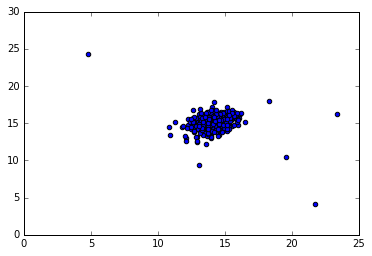

In [232]:
plt.scatter(X[:,0],X[:,1])

In [233]:
def estimate_gaussian(X):
    mu=X.mean(axis=0)
    sigma2=X.var(axis=0)
    return mu,sigma2

In [234]:
mu,sigma2=estimate_gaussian(X)
mu,sigma2

(array([ 14.11222578,  14.99771051]), array([ 1.83263141,  1.70974533]))

In [235]:
def gaussian(x,mu,sigma2):
    p=np.exp(-(x-mu)**2.0/(2*sigma2))/np.sqrt(2*np.pi*sigma2)
    return p

In [236]:
z=np.linspace(0,25)
X1,X2=np.meshgrid(z,z)
P=gaussian(X1,mu[0],sigma2[0])*gaussian(X2,mu[1],sigma2[1])

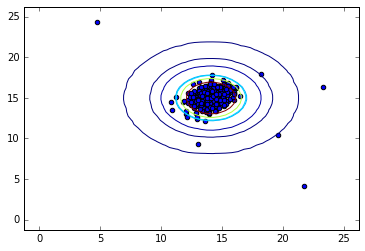

In [237]:
plt.contour(X1,X2,P,[0.0000001,0.0001,0.001,0.009,0.01,0.017,0.03])
plt.scatter(X[:,0],X[:,1])

In [238]:
from scipy import stats

In [239]:
Xval=data['Xval']
yval=data['yval'].T[0]
X.shape,Xval.shape,yval.shape

((307, 2), (307, 2), (307,))

In [240]:
p=gaussian(X[:,0],mu[0],sigma2[0])*gaussian(X[:,1],mu[1],sigma2[1])

In [241]:
pval=np.zeros(Xval.shape)
pval[:,0]=stats.norm(mu[0],sigma2[0]).pdf(Xval[:,0])
pval[:,1]=stats.norm(mu[1],sigma2[1]).pdf(Xval[:,1])
pval.shape

(307, 2)

In [242]:
def select_threshold(pval,yval):
    bestE=0
    bestF1=0
    step=(pval.max()-pval.min())/1000
    for E in np.arange(pval.min(),pval.max(),step):
        pred=(pval.prod(axis=1)<E).astype(int)    #anomaly
        tpos=np.sum(np.logical_and(pred==1,yval==1).astype(float))
        fpos=np.sum(np.logical_and(pred==1,yval==0).astype(float))
        fneg=np.sum(np.logical_and(pred==0,yval==1).astype(float))
        pre=tpos/(tpos+fpos)
        rec=tpos/(tpos+fneg)
        F1=2*pre*rec/(pre+rec)
        if F1>bestF1:
            bestF1=F1
            bestE=E
    return bestE,bestF1

In [243]:
E,F1=select_threshold(pval,yval)
E,F1

(0.00046666858566357785, 0.87500000000000011)

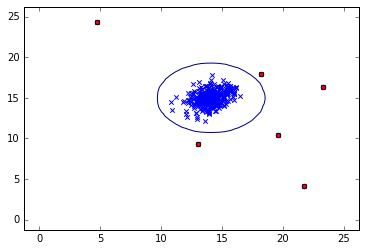

In [244]:
plt.scatter(X[:,0],X[:,1],marker='x')
anomaly=np.where(p<E)[0]
plt.scatter(X[anomaly,0],X[anomaly,1],c='r',marker='o')
plt.contour(X1,X2,P,[E])